In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier as DT
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Decision Tree on Company dataset

In [2]:
df=pd.read_csv('Company_Data.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df["Sales"].min()
df["Sales"].max()
df["Sales"].value_counts()

7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
        ..
8.89     1
13.39    1
9.14     1
5.07     1
9.50     1
Name: Sales, Length: 336, dtype: int64

In [5]:
np.median(df["Sales"])
df["sales"]= "<=7.49"
df.loc[df["Sales"]>=7.49,"sales"]=">=7.49"

In [6]:
df["sales"].unique()
df["sales"].value_counts()

>=7.49    201
<=7.49    199
Name: sales, dtype: int64

In [7]:
df.drop(["Sales"],axis=1,inplace = True)

In [8]:
df.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  sales        400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [10]:
le = preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [11]:
features = df.iloc[:,0:10] 
labels = df.iloc[:,10]

In [12]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.3,stratify = labels)

In [13]:
y_train.value_counts()
y_test.value_counts()

1    60
0    60
Name: sales, dtype: int64

In [14]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

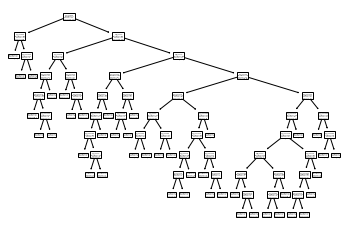

In [15]:
tree.plot_tree(model);

In [16]:
pred_train = pd.DataFrame(model.predict(x_train))
pred_train

,0
0,0
1,0
2,1
3,1
4,1
...,...
275,0
276,1
277,1
278,0


In [17]:
acc_train = accuracy_score(y_train,pred_train)
acc_train

1.0

In [18]:
confusion_mat = pd.DataFrame(confusion_matrix(y_train,pred_train,))
confusion_mat

,0,1
0,139,0
1,0,141


In [19]:
pred_test = pd.DataFrame(model.predict(x_test))
pred_test

,0
0,1
1,1
2,1
3,1
4,1
...,...
115,0
116,1
117,0
118,0


In [20]:
acc_test = accuracy_score(y_test,pred_test)
acc_test

0.7083333333333334

In [21]:
confusion_test = pd.DataFrame(confusion_matrix(y_test,pred_test))
confusion_test

,0,1
0,44,16
1,19,41


## Building Decision Tree Classifier (CART) using Gini Criteria

In [22]:
model_gini = DT(criterion='gini', max_depth=3)

In [23]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
pred=model.predict(x_test)
np.mean(pred_test==y_test)

0      0.0
2      0.0
10     0.0
29     0.0
32     0.0
      ... 
390    0.0
393    0.0
396    0.0
397    0.0
399    0.0
Length: 121, dtype: float64

# Decision tree on Fraud dataset

In [25]:
fraud = pd.read_csv("Fraud_check.csv")
data = fraud.head()

In [26]:
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [27]:
fraud["income"].unique()
fraud["income"].value_counts()

Good     476
Risky    124
Name: income, dtype: int64

In [28]:
fraud = fraud.drop(['Taxable.Income'],axis=1)
fraud.rename(columns={"Marital.Status":"marital","City.Population":"population","Work.Experience":"workexp"},inplace=True)
fraud.isnull().sum()

Undergrad     0
marital       0
population    0
workexp       0
Urban         0
income        0
dtype: int64

In [29]:
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [30]:
features = fraud.iloc[:,0:5]
labels = pd.DataFrame(fraud.iloc[:,5])
fraud["income"].value_counts()

0    476
1    124
Name: income, dtype: int64

In [31]:
x_train, x_test, y_train, y_test = train_test_split(features,labels, test_size=0.3, stratify=labels)

In [32]:
print(y_train["income"].value_counts())
print(y_test["income"].value_counts())

0    333
1     87
Name: income, dtype: int64
0    143
1     37
Name: income, dtype: int64


In [33]:
colnames = list(fraud.columns)
predictors = colnames[:5]
target = colnames[5]

In [34]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Undergrad   600 non-null    int32
 1   marital     600 non-null    int32
 2   population  600 non-null    int64
 3   workexp     600 non-null    int64
 4   Urban       600 non-null    int32
 5   income      600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [39]:
model = DT(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

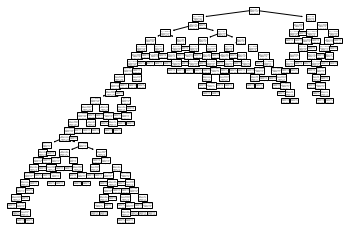

In [40]:
tree.plot_tree(model);

In [41]:
pred_train= pd.DataFrame(model.predict(x_train))

In [42]:
acc_train = accuracy_score(y_train,pred_train)
acc_train

1.0

In [43]:
cm = pd.DataFrame(confusion_matrix(y_train,pred_train))

In [51]:
pred_test2 = pd.DataFrame(model.predict(x_test))

In [45]:
acc_test = accuracy_score(y_test,pred_test)
acc_test

0.6333333333333333

In [47]:
cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test))
cm_test

,0,1
0,106,37
1,29,8
